In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from tabulate import tabulate
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from google.colab import drive
#mounting my google driving to access data
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_UP_DFW.csv')


df2 = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_UP_SYG.csv')

In [ ]:
len(df2)

4981

In [5]:
df1.columns.tolist()

['ID',
 'Cohort Term',
 'degree_seeking',
 'acad_level_code',
 'NTID support',
 'gender',
 'AALANA',
 'subject',
 'catalog_nbr',
 'class_section',
 'Course Title',
 'section Type',
 'Course hours',
 'grade type',
 'Grade',
 'dlmode',
 'Acad Plan',
 'College',
 'term Hours Att',
 'term Hours Earn',
 'term gpa',
 'Cum GPA',
 'sat_math',
 'sat_verb',
 'act_math',
 'act_write',
 'Math Placement',
 'Degree Received',
 'Degree Major',
 'Degree Term',
 'First Generation',
 'Term',
 'Entry Term',
 'SYG',
 'LA',
 'gender dummy',
 'First Gen dummy',
 'AALANA dummy',
 'DFW dummy',
 'UP1 LA Only',
 'UP2 LA Only',
 'UP1&2 No LA',
 'UP1&2 LA',
 'UP1 LA Only SYG',
 'UP2 LA Only SYG',
 'UP1&2 LA SYG',
 'UP1&2 No LA SYG',
 'UP1 LA Only DFW',
 'UP2 LA Only DFW',
 'UP1&2 LA DFW',
 'UP1&2 No LA DFW']

In [4]:
#Xtrain_UP = df1[['UP1 LA Only', 'UP2 LA Only', 'UP1&2 LA']]

Xtrain_UP = df1[['UP1 LA Only', 'UP2 LA Only', 'UP1&2 LA', 'UP1&2 No LA']]
ytrain_UP_DFW = df1['DFW dummy']
ytrain_UP_SYG = df1['SYG']

log_reg_UP_DFW = sm.Logit(ytrain_UP_DFW, Xtrain_UP).fit()
print(log_reg_UP_DFW.summary())


log_reg_UP_SYG = sm.Logit(ytrain_UP_SYG, Xtrain_UP).fit()
print(log_reg_UP_SYG.summary())


Optimization terminated successfully.
         Current function value: 0.541604
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                 8943
Model:                          Logit   Df Residuals:                     8939
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                0.001430
Time:                        01:33:47   Log-Likelihood:                -4843.6
converged:                       True   LL-Null:                       -4850.5
Covariance Type:            nonrobust   LLR p-value:                  0.003086
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
UP1 LA Only    -1.3326      0.051    -26.052      0.000      -1.433      -1.232
UP2 LA Only    -1.0617    

In [5]:
np.exp(log_reg_UP_DFW.params)

,0
UP1 LA Only,0.263790
UP2 LA Only,0.345872
UP1&2 LA,0.285024
UP1&2 No LA,0.314062


ValueError: 'x' and 'y' must have the same size

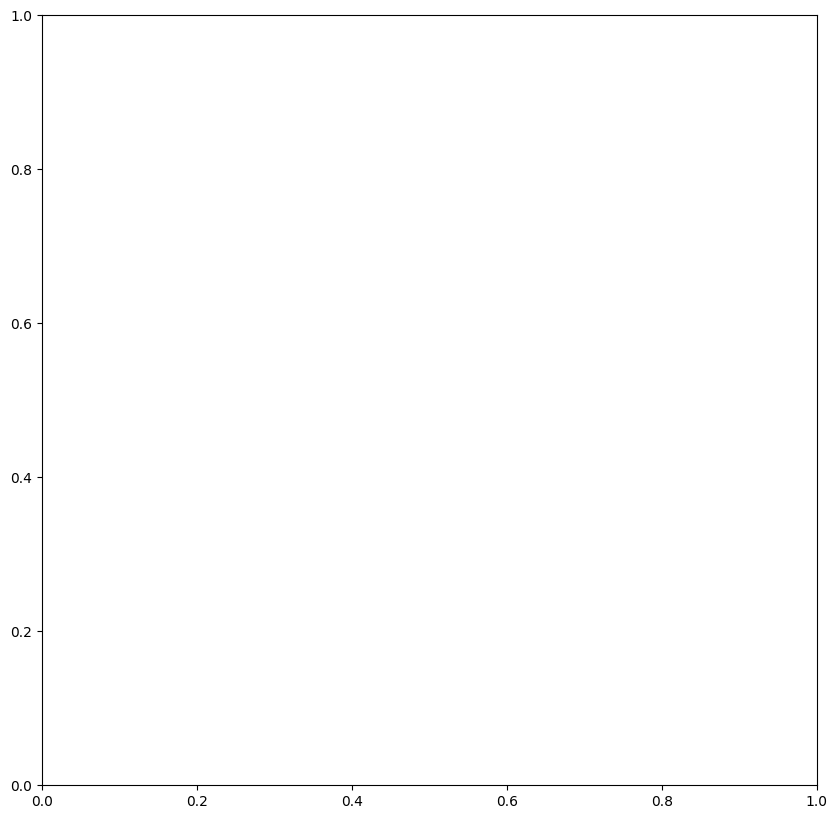

In [7]:

# Sample data (replace this with your data)
exp_coefficients_AALANA_DFW = np.exp(log_reg_UP_DFW.params)
coefficients_AALANA_DFW = log_reg_UP_DFW.params.values
std_errors_AALANA_DFW = log_reg_UP_DFW.bse.values

# Calculate upper and lower bounds of error bars for UP_DFW model
error_range_AALANA_DFW = np.exp(std_errors_AALANA_DFW)  # raise to the power of e
upper_bound_AALANA_DFW = np.exp(coefficients_AALANA_DFW + std_errors_AALANA_DFW)
lower_bound_AALANA_DFW = np.exp(coefficients_AALANA_DFW - std_errors_AALANA_DFW)

# Features (replace this with your feature names)
features = ['PHYS1 LA Only', 'PHYS2 LA Only', 'PHYS1&PHYS2 LA']

# Create a scatter plot with error bars
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust width and height as needed

# Plot coefficient values as dots
dots = ax.errorbar(np.arange(len(features)), exp_coefficients_AALANA_DFW, yerr=[exp_coefficients_AALANA_DFW - lower_bound_AALANA_DFW, upper_bound_AALANA_DFW - exp_coefficients_AALANA_DFW], fmt='o', markersize=15, color='tab:blue', ecolor='tab:blue', capsize=12, capthick=3, linewidth=3.5)  # Adjust capthick here

# Customize the plot
# ax.set_title('DFW Odds for UP1&2 LA Combinations', fontsize=28)
ax.set_xlabel('')
ax.set_ylabel('Feature Effects on DFW Rate', fontsize=28)
ax.set_xticks(np.arange(len(features)))
ax.set_xticklabels(features, fontsize=24)

# Increase y-axis label font size
ax.yaxis.set_tick_params(labelsize=24)

# Add grid to the background
ax.grid(True, which='both', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


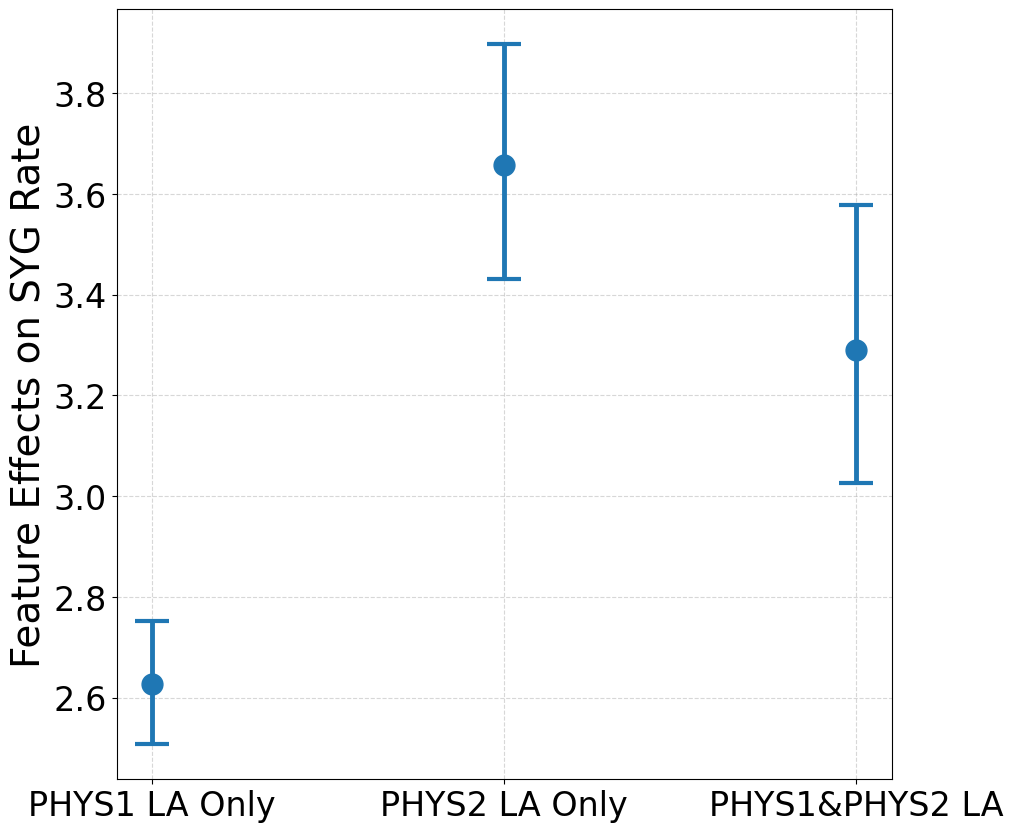

In [ ]:


# Sample data (replace this with your data)
exp_coefficients_AALANA_SYG = np.exp(log_reg_UP_SYG.params)
coefficients_AALANA_SYG = log_reg_UP_SYG.params.values
std_errors_AALANA_SYG = log_reg_UP_SYG.bse.values

# Calculate upper and lower bounds of error bars for UP_SYG model
error_range_AALANA_SYG = np.exp(std_errors_AALANA_SYG)  # raise to the power of e
upper_bound_AALANA_SYG = np.exp(coefficients_AALANA_SYG + std_errors_AALANA_SYG)
lower_bound_AALANA_SYG = np.exp(coefficients_AALANA_SYG - std_errors_AALANA_SYG)

# Features (replace this with your feature names)
features = ['PHYS1 LA Only', 'PHYS2 LA Only', 'PHYS1&PHYS2 LA']

# Create a scatter plot with error bars
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust width and height as needed

# Plot coefficient values as dots
dots = ax.errorbar(np.arange(len(features)), exp_coefficients_AALANA_SYG, yerr=[exp_coefficients_AALANA_SYG - lower_bound_AALANA_SYG, upper_bound_AALANA_SYG - exp_coefficients_AALANA_SYG], fmt='o', markersize=15, color='tab:blue', ecolor='tab:blue', capsize=12, capthick=3, linewidth=3.5)  # Adjust capthick here

# Customize the plot
# ax.set_title('SYG Odds for UP1&2 LA Combinations', fontsize=28)
ax.set_xlabel('')
ax.set_ylabel('Feature Effects on SYG Rate', fontsize=28)
ax.set_xticks(np.arange(len(features)))
ax.set_xticklabels(features, fontsize=24)

# Increase y-axis label font size
ax.yaxis.set_tick_params(labelsize=24)

# Add grid to the background
ax.grid(True, which='both', linestyle='--', alpha=0.5)

# Show the plot
plt.show()
